In [62]:
require(data.table)
require(ltm)

In [63]:
# Lendo arquivo no data.table
path_ = "datasets/StudentPerformance/Student_Performance.csv"

studentPeformance = fread(path_)

In [64]:
head(x = studentPeformance, n = 5)

Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
<int>,<int>,<chr>,<int>,<int>,<dbl>
7,99,Yes,9,1,91
4,82,No,4,2,65
8,51,Yes,7,2,45
5,52,Yes,5,2,36
7,75,No,8,5,66


In [65]:
summary(studentPeformance)

 Hours Studied   Previous Scores Extracurricular Activities  Sleep Hours   
 Min.   :1.000   Min.   :40.00   Length:10000               Min.   :4.000  
 1st Qu.:3.000   1st Qu.:54.00   Class :character           1st Qu.:5.000  
 Median :5.000   Median :69.00   Mode  :character           Median :7.000  
 Mean   :4.993   Mean   :69.45                              Mean   :6.531  
 3rd Qu.:7.000   3rd Qu.:85.00                              3rd Qu.:8.000  
 Max.   :9.000   Max.   :99.00                              Max.   :9.000  
 Sample Question Papers Practiced Performance Index
 Min.   :0.000                    Min.   : 10.00   
 1st Qu.:2.000                    1st Qu.: 40.00   
 Median :5.000                    Median : 55.00   
 Mean   :4.583                    Mean   : 55.22   
 3rd Qu.:7.000                    3rd Qu.: 71.00   
 Max.   :9.000                    Max.   :100.00   

Verificando valores nulos no `data.table`

In [66]:
# Contando valores nulos em cada coluna
count.na = studentPeformance[,
    lapply(X = .SD,
    FUN = function(x){
        return(sum(is.null((x))))
    })
]

# Criando o dataframe para melhor visualização
data.frame(
    colunas = names(count.na),
    `quantidade de valores nulos` = transpose(count.na)[,V1]
)

colunas,quantidade.de.valores.nulos
<chr>,<int>
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [67]:
horas.extracurricular = studentPeformance[, .N, by="Extracurricular Activities"]
horas.extracurricular

Extracurricular Activities,N
<chr>,<int>
Yes,4948
No,5052


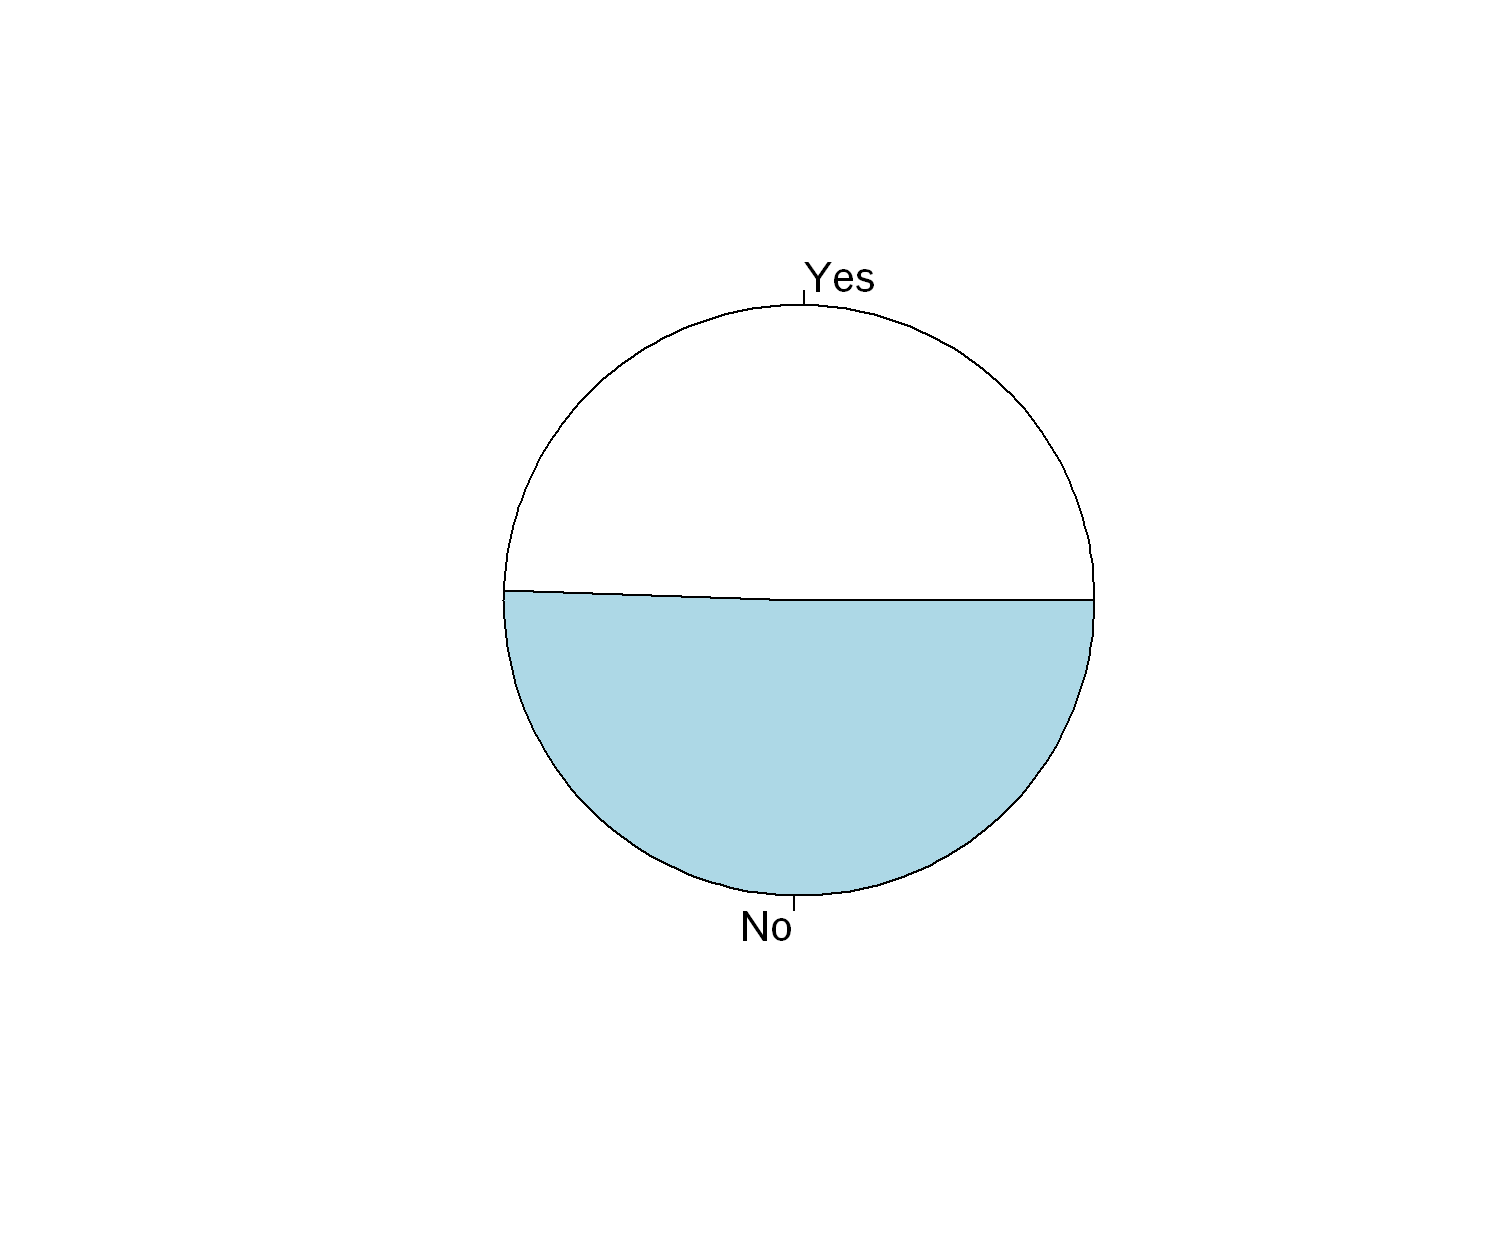

In [79]:
par(bg = "white")
options(repr.plot.width = 6, repr.plot.height = 5, repr.plot.res = 250)


pie( x      = horas.extracurricular[, N], 
     labels = c("Yes", "No"))

Correlação entre a variavel numerica e binaria. Performance Index e Atv. Extracurricular possui alta correlação|associação?

In [69]:
studentPeformance[, 
    horas.extracurricular.bin := as.numeric(
        factor(studentPeformance$`Extracurricular Activities`)
        )
    ]
head(studentPeformance,n = 3)

Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,horas.extracurricular.bin
<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>
7,99,Yes,9,1,91,2
4,82,No,4,2,65,1
8,51,Yes,7,2,45,2


In [70]:
# Usando a correlação de peason
cor(
    studentPeformance$`Performance Index`, studentPeformance$horas.extracurricular.bin,
    method = c("pearson")
)

[1] 0.02452495

> Possuem uma baixa correlação, mas verei outro metodo

In [71]:
# PointBisserl
biserial.cor(
    x = studentPeformance$`Performance Index`,
    y = studentPeformance$horas.extracurricular.bin
)

[1] -0.02452495

> Poderia remover essa varivel do modelo, contudo, vou utilizar todos e verificar por meio de teste de hipotese os coeficiente com significancia

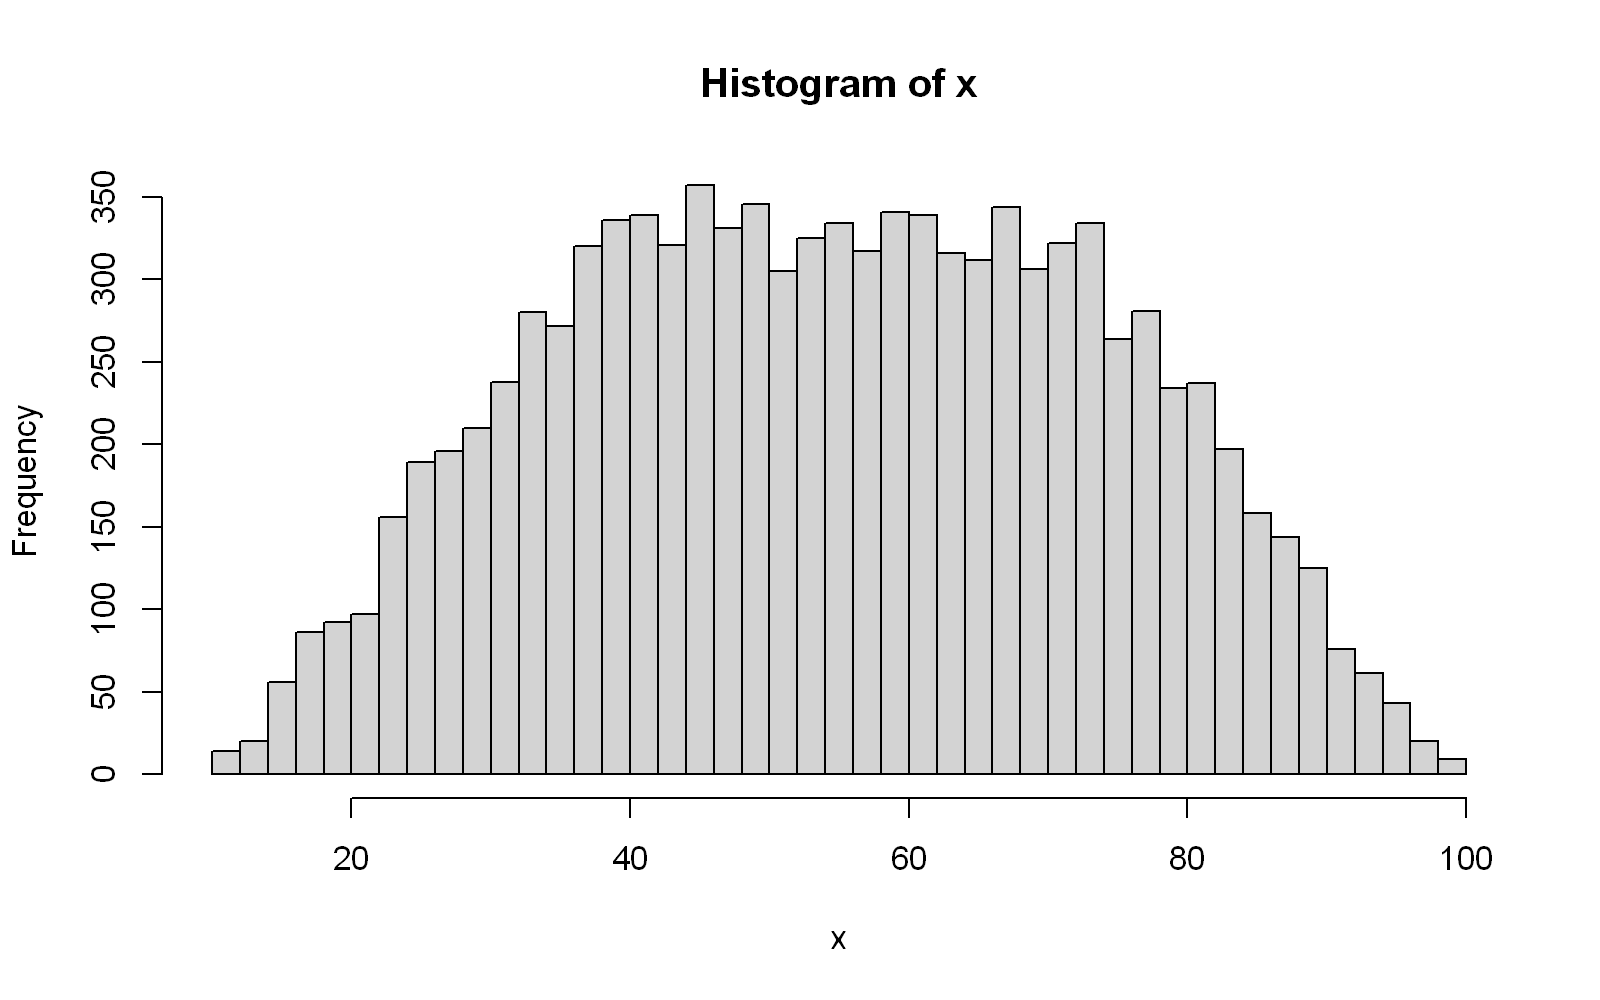

In [96]:
# Verificando a distribuição dos dados na hora de estudo
par(bg = "white")
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 200)

x = studentPeformance$`Performance Index`
hist(x, 40)

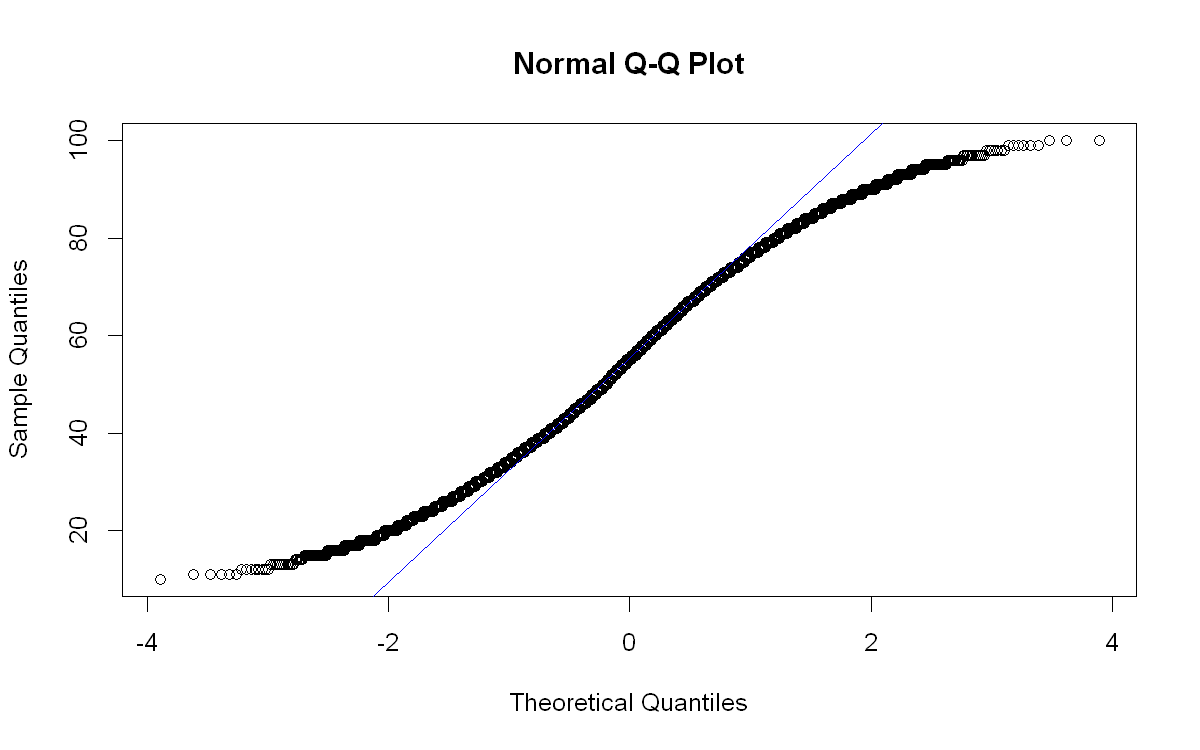

In [100]:
par(bg = "white")
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 150)

qqnorm(x)
qqline(x, col = "blue")

In [107]:
ks.test(x, "pnorm",  mean = mean(x), sd = sd(x))

Warning message in ks.test.default(x, "pnorm", mean = mean(x), sd = sd(x)):
"não devem existir empates no teste de Kolmogorov-Smirnov de apenas uma amostra"



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  x
D = 0.045526, p-value < 2.2e-16
alternative hypothesis: two-sided


> p-valor não é maior 0.05 de significancia, dados não seguem um distribuição normal

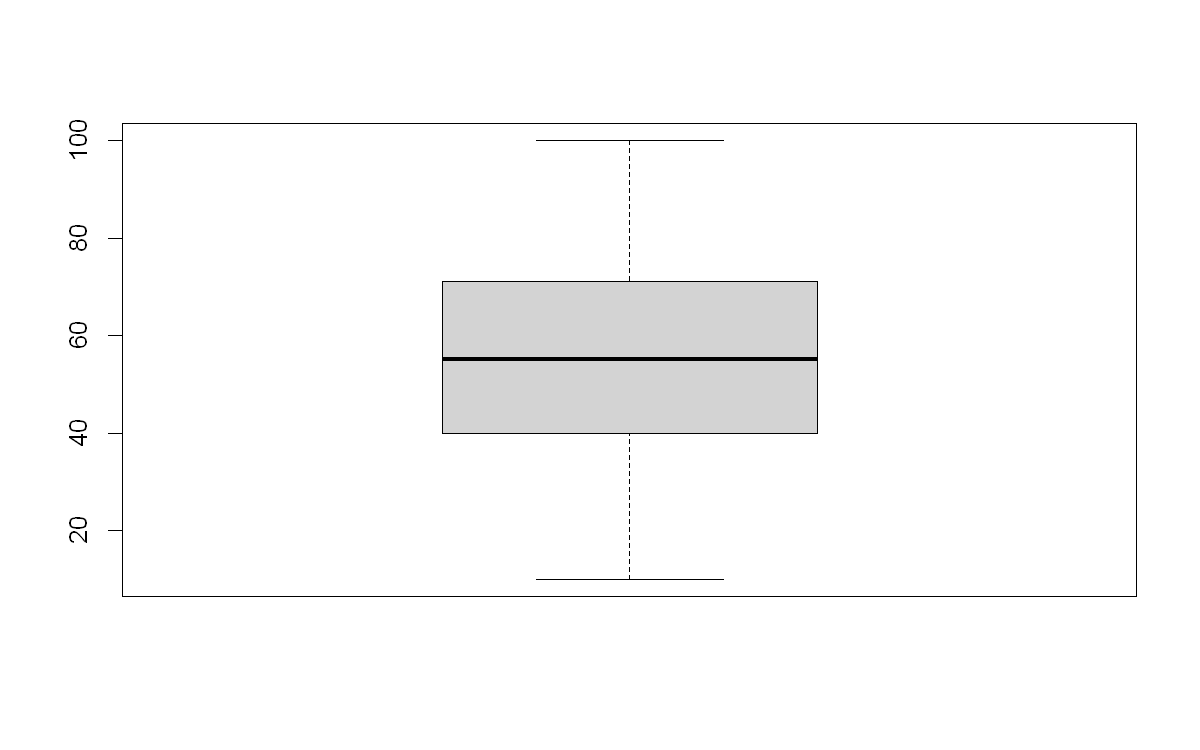

In [110]:
par(bg = "white")
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 150)
boxplot(x)

> Não há outliers na variavel alvo

In [82]:
# Verificando performane média de alunos em relação a horas de estudo

perfomance.hora = studentPeformance[, 
    mean(`Performance Index`), by = "Hours Studied"
    ]

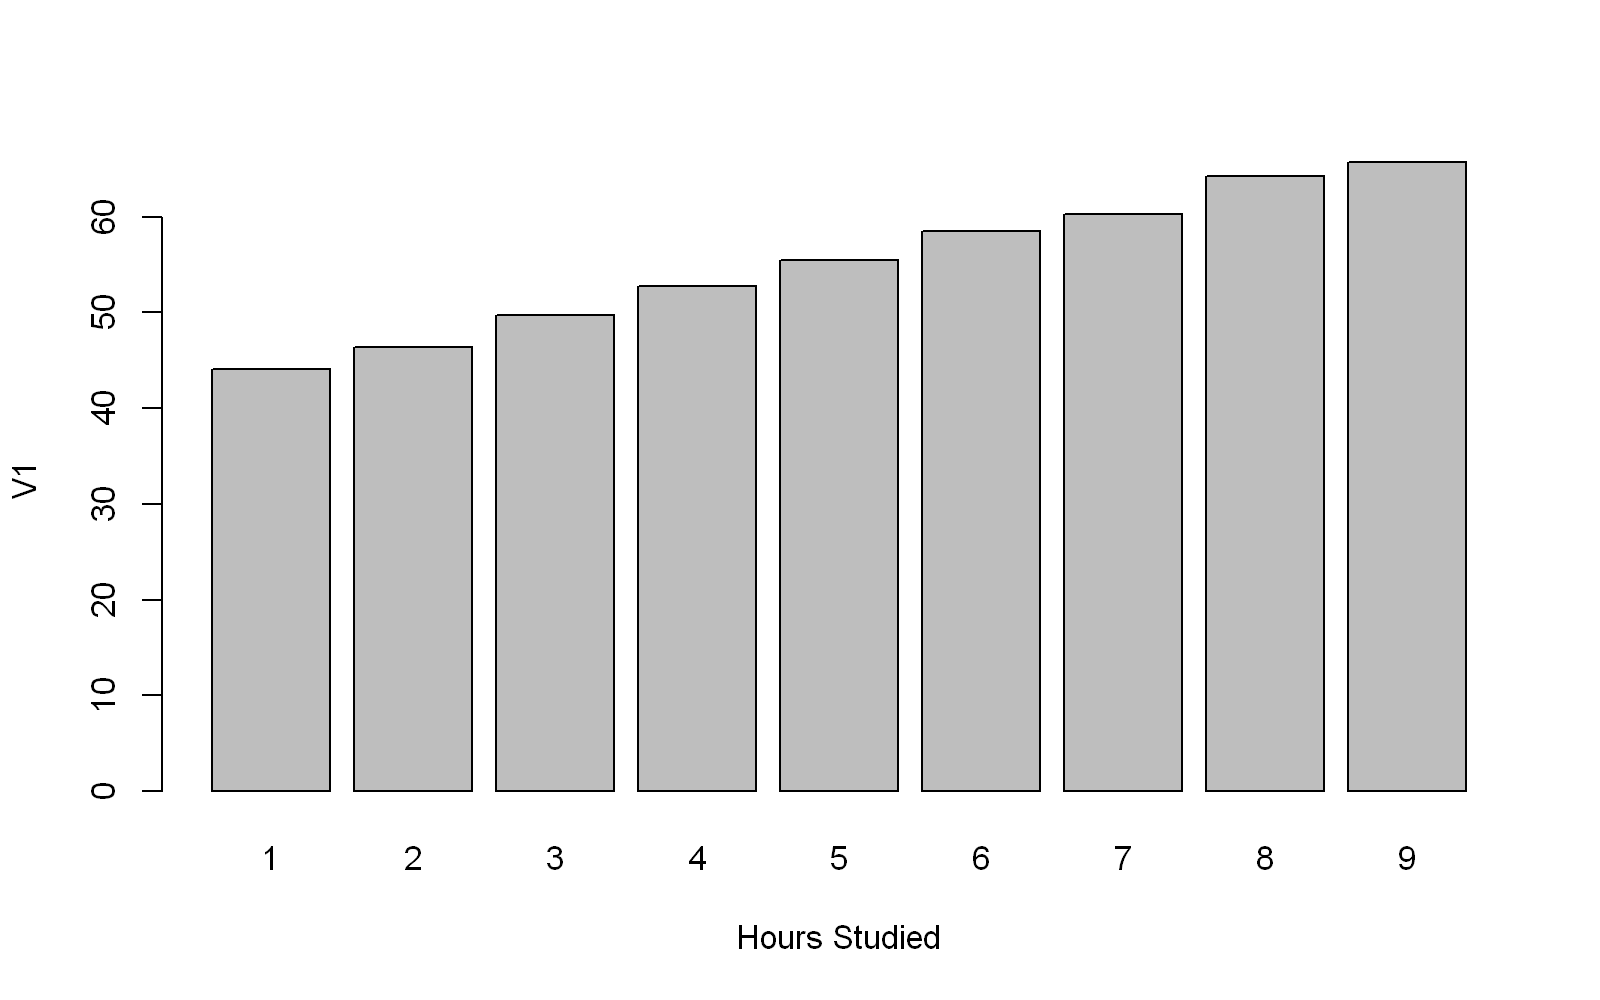

In [73]:
par(bg = "white")
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 200)

barplot(V1~., data = perfomance.hora)

> Há um tedencia de aumento 

Modelo Regressão Multipla R

In [59]:
model = NULL